## Example XGBoost implementation using the Iris Data set

In [ ]:
## Import necessary packages
import pandas as pd
import numpy as np
import xgboost
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error

## For plotting
import matplotlib.pyplot as plt
from seaborn import set_style
## This sets the plot style
## to have a grid on a white background
set_style("whitegrid")

## Brief overview of XGBoost 

Inputs 
- `max_depth`: max depth of a tree; increasing this makes the model more complex (typically between 3-10)

- `n_estimators`: Number of trees to fit, higher values = improved performance when paried with lower learning rate (typically 100-1000+)
- `learning_rate`: Shrinks contribution of each tree; lower values means slower model (typically 0.01-0.3)
- `objective`: Specifies learning task; for us binary:logistic means binary classification with logistic regression
- `subsample`: Fraction of training data samples for each tree (prevents overfitting)
- `colsample_bytree`: Fraction of features randomly samples for each tree (prevents overfitting)
- `gamma`: minimum loss reduction required to make a further partition on a leaf node. Higher gamma = more conservative
- `min_child_weight`: Minimum sum of instance weights (hessian) needed in a child; regularization tool
- `early_stopping_rounds`: when given a validation set in the .fit method, stops training early once rmse stops improving after a given number of rounds

In [ ]:
#load data
data = load_iris()

#test split
X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], test_size=.2,stratify=data.target)

# # test parameter values using optuna (this goes inside of an objective function)
# # eg. Try out different values of max_depth from 2 to 10 (e.g., 2, 3, 4, ..., 10)
# max_depth        = trial.suggest_int("max_depth", 3, 10, step=1)
# learning_rate    = trial.suggest_float("learning_rate", 0.01, 0.3, log=True)
# n_estimators     = trial.suggest_int("n_estimators", 100, 1000, step=50)
# subsample        = trial.suggest_float("subsample", 0.5, 1.0)
# colsample_bytree = trial.suggest_float("colsample_bytree", 0.5, 1.0)
# gamma            = trial.suggest_float("gamma", 0.0, 10.0)
# min_child_weight = trial.suggest_int("min_child_weight", 1, 10)

# model = XGBClassifier(max_depth=max_depth,
#                                   learning_rate=learning_rate,
#                                   objective = 'binary:logistic',
#                                   n_estimators=n_estimators,
#                                   subsample=subsample,
#                                   colsample_bytree=colsample_bytree,
#                                   gamma=gamma,
#                                   min_child_weight=min_child_weight)

# create model instance
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')

# fit model
bst.fit(X_train, y_train)

# make predictions
preds = bst.predict(X_test)

#compute error
error = 1-mean_squared_error(y_test,preds)

error

0.9333333333333333

In [21]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

A nice feature of `xgboost`'s model is that it automatically records the performance at each training step on a validation set, provided we give the model the validation set.

In [15]:
## make a data set
np.random.seed(220)
X = np.linspace(-2,2,200)

y = X**2 + np.random.randn(200)   #perturbed quadratic

## Here I will generate a validation set because the data are randomly generated
## in practice you would need to split the data
X_val = np.linspace(-2,2,200)
y_val = X_val**2 + np.random.randn(200)

## make an XGBRegressor object
## n_estimators = 500, max_depth = 1, learning_rate = .1
xgb_reg = xgboost.XGBRegressor(n_estimators=500,
                          max_depth=1,
                          learning_rate=.1)

## fit the model, including an eval_set
xgb_reg.fit(X.reshape(-1,1), y, eval_set=[(X_val.reshape(-1,1), y_val)])

[0]	validation_0-rmse:1.54899
[1]	validation_0-rmse:1.52290
[2]	validation_0-rmse:1.50193
[3]	validation_0-rmse:1.47916
[4]	validation_0-rmse:1.45973
[5]	validation_0-rmse:1.44298
[6]	validation_0-rmse:1.42224
[7]	validation_0-rmse:1.40793
[8]	validation_0-rmse:1.38755
[9]	validation_0-rmse:1.37459
[10]	validation_0-rmse:1.35682
[11]	validation_0-rmse:1.34557
[12]	validation_0-rmse:1.33130
[13]	validation_0-rmse:1.32148
[14]	validation_0-rmse:1.30755
[15]	validation_0-rmse:1.29891
[16]	validation_0-rmse:1.28486
[17]	validation_0-rmse:1.27751
[18]	validation_0-rmse:1.26761
[19]	validation_0-rmse:1.26103
[20]	validation_0-rmse:1.24782
[21]	validation_0-rmse:1.24212
[22]	validation_0-rmse:1.23019
[23]	validation_0-rmse:1.22604
[24]	validation_0-rmse:1.21845
[25]	validation_0-rmse:1.21415
[26]	validation_0-rmse:1.20378
[27]	validation_0-rmse:1.19984
[28]	validation_0-rmse:1.19375
[29]	validation_0-rmse:1.18998
[30]	validation_0-rmse:1.18107
[31]	validation_0-rmse:1.17800
[32]	validation_0-

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=1, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [16]:
## demonstrate .evals_result()
xgb_reg.evals_result()

{'validation_0': OrderedDict([('rmse',
               [1.548992973005192,
                1.522898460043541,
                1.5019322572941625,
                1.4791558934893079,
                1.459727081610891,
                1.4429755160429023,
                1.422241926442193,
                1.4079251994662687,
                1.387546516325034,
                1.3745858729659668,
                1.3568164708290134,
                1.3455746704935363,
                1.331297495073885,
                1.3214799250800593,
                1.307554816763263,
                1.2989090118283606,
                1.2848600190832,
                1.2775103476131882,
                1.267609503957405,
                1.2610326527471278,
                1.2478243476133408,
                1.2421230021266132,
                1.2301866017071799,
                1.226041235796189,
                1.2184516736152855,
                1.2141506219616427,
                1.203777134355357,
  

In [17]:
## get the 'rmse'
xgb_reg.evals_result()['validation_0']['rmse']

[1.548992973005192,
 1.522898460043541,
 1.5019322572941625,
 1.4791558934893079,
 1.459727081610891,
 1.4429755160429023,
 1.422241926442193,
 1.4079251994662687,
 1.387546516325034,
 1.3745858729659668,
 1.3568164708290134,
 1.3455746704935363,
 1.331297495073885,
 1.3214799250800593,
 1.307554816763263,
 1.2989090118283606,
 1.2848600190832,
 1.2775103476131882,
 1.267609503957405,
 1.2610326527471278,
 1.2478243476133408,
 1.2421230021266132,
 1.2301866017071799,
 1.226041235796189,
 1.2184516736152855,
 1.2141506219616427,
 1.203777134355357,
 1.1998376997409927,
 1.1937490626417429,
 1.1899789685735782,
 1.181068435994735,
 1.1779978675417935,
 1.1717220205218764,
 1.1686770265656818,
 1.1639865204327748,
 1.1614914391530609,
 1.1558727688413208,
 1.1533699354275393,
 1.1476304026128281,
 1.146934120717663,
 1.141865057658279,
 1.1413456838955172,
 1.136666607985323,
 1.1349010839708962,
 1.1317052199500124,
 1.1313765625141952,
 1.1272020820922395,
 1.1270087591338531,
 1.123148

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from xgboost import XGBClassifier
import numpy as np
import optuna

X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], test_size=.2,stratify=data.target)
#maybe stratify so that our training sets have same ratio as the real world vandalism ratios

def objective(trial):
    # Suggest hyperparameters
    max_depth        = trial.suggest_int("max_depth", 3, 10)
    learning_rate    = trial.suggest_float("learning_rate", 0.01, 0.3, log=True)
    n_estimators     = trial.suggest_int("n_estimators", 100, 1000, step=50)
    subsample        = trial.suggest_float("subsample", 0.5, 1.0)
    colsample_bytree = trial.suggest_float("colsample_bytree", 0.5, 1.0)
    gamma            = trial.suggest_float("gamma", 0.0, 10.0)
    min_child_weight = trial.suggest_int("min_child_weight", 1, 10)

    # Prepare cross-validation; Q: do we need to do this?
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    losses = []

    for train_index, test_index in cv.split(X, y):
        X_tt, X_ho = X_train.iloc[train_index], X_train.iloc[test_index]
        y_tt, y_ho = y_train.iloc[train_index], y_train.iloc[test_index]

        model = XGBClassifier(
            max_depth=max_depth,
            learning_rate=learning_rate,
            n_estimators=n_estimators,
            subsample=subsample,
            colsample_bytree=colsample_bytree,
            gamma=gamma,
            min_child_weight=min_child_weight,
            objective='binary:logistic',
            use_label_encoder=False,
            eval_metric='logloss', #do we want to use logloss as our metric??
            verbosity=0     # don't print out any info in each run
        )

        model.fit(X_tt, y_tt)
        y_prob = model.predict_proba(X_ho)
        losses.append(log_loss(y_ho, y_prob))

    return np.mean(losses)

#use optuna to optimize the objective
study = optuna.create_study()
study.optimize(objective, n_trials=100, timeout=1800)

study.best_params

ModuleNotFoundError: No module named 'optuna'

### SMOTE - Synthetic Minority Over-sampling Technique
Gives a bunch of extra of fake data made by linear interpolation which can beef up classes; reasonable if classes live in convex classes; depends on what the data looks like

Make sure synthetic data does not end up in training or test to stop data leakage.

### First XGBoost runs on smaller csv files

In [58]:
data

,EditType,EditID,comment,isvandalism,user,user_edit_count,user_distinct_pages,user_warns,user_reg_time,prev_user,...,title,namespace,creator,num_recent_edits,num_recent_reversions,current_minor,current_timestamp,previous_timestamp,num_revisions_3d_before,num_revisions_3d_after
0,change,327231971,Replacing {{IPAr|pl| with {{IPAc-pl|,0,Chris G,20253,0,5,1156663762,Kotniski,...,Mojesz,main,Kotbot,0,0,True,1258863344,1248560588,1,0
1,change,327232052,/* Reception */ Fixed obvious typos,0,4.90.58.167,1,1,0,20091122041616,118.93.7.40,...,Live_at_Reading,main,Scentlessapprentice,0,0,False,1258863376,1258794290,5,0
2,change,327232115,NaN,0,Rontrigger,20508,8470,0,1174853655,66.150.159.10,...,Paul_Moyer,main,TVXPert,0,0,True,1258863410,1255565411,1,0
3,change,327232194,/* Plot */,0,163.192.13.105,2,2,0,20091122041727,216.249.95.247,...,Night_of_the_Living_Dead_(1990_film),main,Altermoor,0,0,False,1258863447,1257058667,1,0
4,change,327232220,/* Biography */,1,173.188.137.39,6,3,0,20091122041742,173.188.137.39,...,Tré_Cool,main,Prefect,0,0,False,1258863462,1258863191,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,change,327276994,/* Confidentiality */,1,117.195.39.211,3,2,1,20091122121638,82.152.23.210,...,Information_security,main,Conversion script,0,0,False,1258892198,1258821393,4,0
296,change,327277341,major alterations,0,Vdiest,4515,774,0,1120534297,Eastmain,...,Namibe_Partial_Reserve,main,Vdiest,0,0,False,1258892428,1258855029,3,0
297,change,327277463,NaN,0,86.131.65.89,9,3,0,20091122122144,86.131.65.89,...,Scotch_whisky,main,Conversion script,0,0,False,1258892504,1258892447,6,0
298,change,327277520,NaN,1,80.2.120.204,12,10,0,20091122122221,IvanLanin,...,Weaving,main,Karen Johnson,0,0,False,1258892541,1257102723,1,0


In [59]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#import data
data = pd.read_csv("../../Data/edit_revision_freq.csv")

#features
features = ["user_edit_count","user_distinct_pages","user_warns","num_revisions_3d_before"]

#convert isvandalism to binary
data.isvandalism=data.isvandalism.astype(int)

#train test split 
X_train, X_test, y_train, y_test = train_test_split(data[features], data['isvandalism'], test_size=.2,stratify=data.isvandalism)

# model
bst = XGBClassifier(n_estimators=1, max_depth=1, learning_rate=1, objective='binary:logistic')

# fit model
bst.fit(X_train, y_train)

# make predictions
preds = bst.predict(X_test)

#compute error
accuracy = accuracy_score(y_test,preds)
con_mat = confusion_matrix(y_test,preds)
accuracy,con_mat


(0.9,
 array([[54,  0],
        [ 6,  0]]))

In [ ]:
data.isvandalism.sum()

np.int64(10)

In [64]:
data.user_edit_count.mean()

np.float64(82893.80666666667)

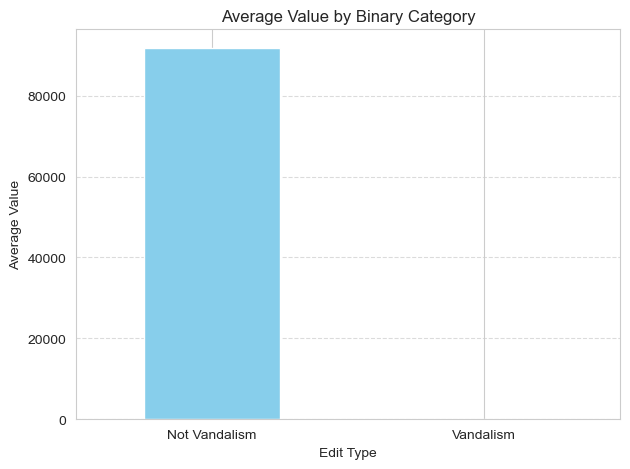

In [65]:
grouped = data.groupby('isvandalism')['user_edit_count'].mean()
grouped.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Average Value by Binary Category')
plt.xlabel('Edit Type')
plt.ylabel('Average Value')
plt.xticks([0, 1], ['Not Vandalism', 'Vandalism'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
grouped = data.groupby('isvandalism')['user_edit_count'].mean()
grouped.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Average Value by Binary Category')
plt.xlabel('Binary')
plt.ylabel('Average Value')
plt.xticks([0, 1], ['0', '1'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

isvandalism
0    91760.542435
1       35.689655
Name: user_edit_count, dtype: float64